# **Tugas 2 data_understanding**
## **Penjelasan Outlier Deteksi**
### **Deteksi Outlier dengan K-Nearest Neighbors (KNN) dalam Data Understanding**  
#### 1. Pengantar Outlier dalam Data Understanding
Outlier adalah data yang memiliki nilai yang jauh berbeda dibandingkan dengan sebagian besar data dalam suatu kumpulan. Keberadaannya bisa disebabkan oleh berbagai faktor, seperti kesalahan dalam pengukuran, kesalahan saat memasukkan data, atau memang karena adanya kejadian langka. Saat memahami data (Data Understanding), mendeteksi outlier menjadi langkah penting karena dapat memengaruhi hasil analisis, pemodelan, dan pengambilan keputusan. Jika outlier tidak terdeteksi, model statistik atau machine learning bisa menjadi bias, kurang akurat, atau bahkan gagal memberikan hasil yang valid.

#### 2. Konsep K-Nearest Neighbors (KNN) dalam Deteksi Outlier
K-Nearest Neighbors (KNN) adalah algoritma berbasis kedekatan yang sering digunakan untuk klasifikasi dan regresi. Namun, KNN juga dapat dimanfaatkan dalam deteksi outlier dengan mengukur seberapa jauh suatu titik data dari tetangga terdekatnya. Berikut adalah konsep dasar KNN dalam deteksi outlier:


*   Prinsip Kerja KNN:



KNN menghitung jarak antara suatu titik data dengan titik-titik data lain di sekitarnya. Titik data yang memiliki jarak jauh dari sebagian besar tetangganya dianggap sebagai outlier.
Secara matematis, KNN mengukur jarak (misalnya, Euclidean, Manhattan, atau Minkowski) antara titik data dan k-tetangga terdekatnya. Jika jarak rata-rata ke k-tetangga terdekat tersebut lebih besar dari ambang batas tertentu, titik data tersebut dianggap sebagai outlier.

#### Kapan Menggunakan KNN untuk Deteksi Outlier?
K-Nearest Neighbors (KNN) dapat digunakan untuk mendeteksi outlier dalam berbagai situasi, tetapi lebih efektif dalam kondisi tertentu. Berikut adalah beberapa skenario di mana KNN cocok digunakan untuk deteksi outlier:

Ketika Data Tidak Berasumsi Distribusi Tertentu
KNN adalah metode berbasis kedekatan yang tidak bergantung pada asumsi distribusi data, seperti normal atau Gaussian.
Jika dataset memiliki pola distribusi yang tidak diketahui atau tidak mengikuti distribusi tertentu, KNN bisa menjadi pilihan yang baik untuk mendeteksi outlier.

Ketika Dataset Tidak Terlalu Besar
KNN memerlukan perhitungan jarak antara setiap titik data, sehingga kurang efisien untuk dataset yang sangat besar.
Jika dataset berukuran kecil hingga menengah, KNN dapat bekerja dengan baik karena masih dapat menangani perhitungan jarak dengan cepat.

Saat Data Berupa Data Numerik dan Berbasis Jarak
KNN bekerja dengan menghitung jarak antara titik-titik data, sehingga lebih cocok untuk data numerik.
Jika data berbentuk kategori, perlu dikonversi ke bentuk numerik atau menggunakan metrik jarak yang sesuai.


#### Kesimpulan
K-Nearest Neighbors (KNN) adalah metode berbasis jarak yang dapat digunakan untuk mendeteksi outlier dengan mengukur kedekatan suatu titik terhadap tetangga terdekatnya. KNN cocok digunakan ketika dataset berukuran kecil hingga menengah, tidak memiliki asumsi distribusi tertentu, dan outlier dapat diidentifikasi berdasarkan jarak.

Namun, KNN kurang efisien untuk dataset yang sangat besar atau berdimensi tinggi karena memerlukan banyak perhitungan jarak. Selain itu, jika outlier tidak dapat dideteksi hanya berdasarkan jarak, metode lain seperti DBSCAN, Isolation Forest, atau Autoencoder mungkin lebih efektif. Oleh karena itu, pemilihan metode deteksi outlier harus disesuaikan dengan karakteristik dataset dan tujuan analisis.

### Koneksi dan Analisis

- Menghubungkan ke Database
  - Menggunakan psycopg2 untuk PostgreSQL atau pymysql untuk MySQL guna mengakses database.  

- Mengambil & Mengolah Data  
  - Menggunakan pandas untuk membaca data dari database atau file.  
  - Menggunakan numpy untuk melakukan perhitungan matematis.  

- Visualisasi Data  
  - Menggunakan seaborn dan matplotlib untuk menyajikan data dalam bentuk grafik.  

- Deteksi Outlier dengan LOF  
  - Memanfaatkan jarak Euclidean untuk mengukur kedekatan antar titik data.  
  - Menggunakan NearestNeighbors untuk mencari tetangga terdekat.  
  - Menghitung Local Outlier Factor (LOF) guna mengidentifikasi titik yang berpotensi sebagai outlier.

In [17]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.neighbors import NearestNeighbors

#### Koneksi ke Database PostgreSQL
 Menggunakan psycopg2.connect() untuk membuat koneksi ke database PostgreSQL.

Parameter koneksi:

host → Alamat server database.

user → Nama pengguna database.

password → Kata sandi database.

database → Nama database yang akan diakses.

port → Port yang digunakan untuk koneksi PostgreSQL (10845).

In [18]:
def get_pg_data():
    conn = psycopg2.connect(
        host= "pg-95a74ae-mysqlsahqi.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_4Wa9Rjgb5ekAs4rlnX0",
        database="defaultdb",
        port=28926
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

#### Koneksi ke Database MySQL
Menggunakan pymysql.connect() untuk membuat koneksi ke database MySQL.

Parameter koneksi:

host → Alamat server database.

user → Nama pengguna database.

password → Kata sandi database.

database → Nama database yang akan diakses.

port → Port koneksi MySQL (10845).

In [19]:
def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-27650795-mysqlsahqi.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_MRHI_ER4NmdlSWM5fr_",
        database="defaultdb",
        port=28926
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

#### Deteksi Outlier dengan KNN
Kode ini bertujuan untuk mengambil data dari PostgreSQL dan MySQL, menggabungkannya, lalu mengidentifikasi outlier menggunakan metode K-Nearest Neighbors (KNN).

 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5      0.133137    False
  2     Iris-setosa          14.0          2.0          40.9         30.0     43.258305     True
  3     Iris-setosa           1.3          0.2           4.7          3.2      0.236019    False
  4     Iris-setosa           1.5          0.2           4.6          3.1      0.209551    False
  5     Iris-setosa           1.4          0.2           5.0          3.6      0.191277    False
  6     Iris-setosa           1.7          0.4           5.4          3.9      0.360018    False
  7     Iris-setosa           1.4          0.3           4.6          3.4      0.284127    False
  8     Iris-setosa           1.5          0.2           5.0          3.4      0.167647    False
  9     Iris-setosa           1.4          0.2           4.4          2.9      0.292923    False
 10     Iris-setosa           

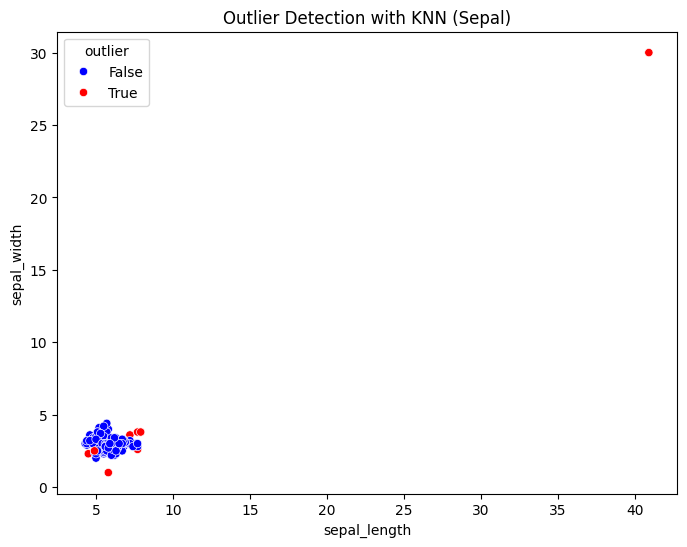

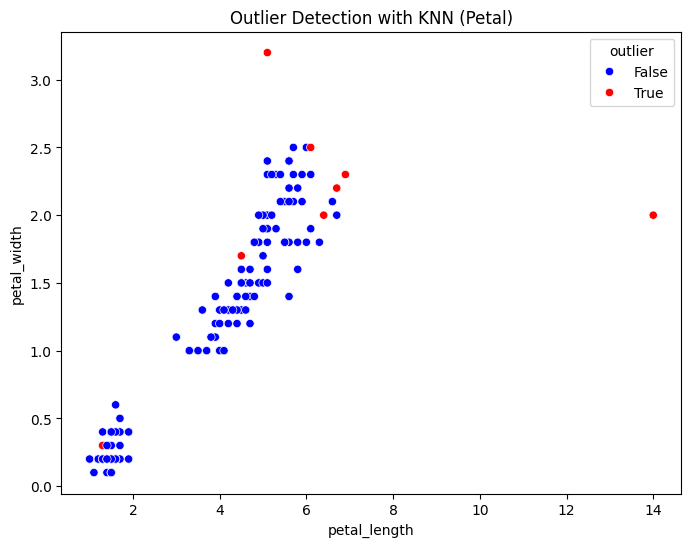

In [20]:
# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Gunakan KNN untuk mendeteksi outlier
K = 5  # Jumlah tetangga terdekat
nbrs = NearestNeighbors(n_neighbors=K+1, metric='euclidean').fit(data_values)
distances, indices = nbrs.kneighbors(data_values)

# Ambil rata-rata jarak ke K tetangga terdekat (tidak termasuk jarak ke dirinya sendiri)
df_merged["knn_distance"] = np.mean(distances[:, 1:], axis=1)

# Tentukan threshold outlier berdasarkan persentil ke-95
threshold = np.percentile(df_merged["knn_distance"], 95)
df_merged["outlier"] = df_merged["knn_distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection with KNN (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection with KNN (Petal)")
plt.show()

#### Total outlier
Kode berikut digunakan untuk menghitung total jumlah outlier yang terdeteksi dalam dataset

In [21]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")

Total Outlier: 8


#### Menampilkan daftar outlier yang terdeteks

In [22]:
outliers = df_merged[df_merged["outlier"]].sort_values(by="knn_distance", ascending=False)
print("Outlier Teratas:")
print(outliers.to_string(index=False))

Outlier Teratas:
 id          class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
  2    Iris-setosa          14.0          2.0          40.9         30.0     43.258305     True
151            ???           5.1          3.2           5.8          1.0      2.035647     True
132 Iris-virginica           6.4          2.0           7.9          3.8      0.836056     True
118 Iris-virginica           6.7          2.2           7.7          3.8      0.823174     True
107 Iris-virginica           4.5          1.7           4.9          2.5      0.810164     True
119 Iris-virginica           6.9          2.3           7.7          2.6      0.749237     True
 42    Iris-setosa           1.3          0.3           4.5          2.3      0.736302     True
110 Iris-virginica           6.1          2.5           7.2          3.6      0.714318     True


In [ ]:
#### Mengurutkan data by KNN

# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="knn_distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))


 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
 10     Iris-setosa           1.5          0.1           4.9          3.1      0.109282    False
 35     Iris-setosa           1.5          0.1           4.9          3.1      0.109282    False
 38     Iris-setosa           1.5          0.1           4.9          3.1      0.109282    False
  1     Iris-setosa           1.4          0.2           5.1          3.5      0.133137    False
 40     Iris-setosa           1.5          0.2           5.1          3.4      0.139494    False
 18     Iris-setosa           1.4          0.3           5.1          3.5      0.152207    False
 28     Iris-setosa           1.5          0.2           5.2          3.5      0.164215    False
 29     Iris-setosa           1.4          0.2           5.2          3.4      0.164215    False
  8     Iris-setosa           1.5          0.2           5.0          3.4      0.167647    False
 31     Iris-setosa           

In [9]:
petal_sepal =  pd.merge(df_mysql, df_postgresql)
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [10]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()

# Buat DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Ganti nama kolom agar sesuai dengan yang diminta
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Ambil hanya kolom yang diperlukan
X = df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]

print(X.head()) # Cek hasil

   petal_length  petal_width  sepal_length  sepal_width
0           1.4          0.2           5.1          3.5
1           1.4          0.2           4.9          3.0
2           1.3          0.2           4.7          3.2
3           1.5          0.2           4.6          3.1
4           1.4          0.2           5.0          3.6


In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Ganti nama kolom agar sesuai dengan permintaan
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Pastikan df_merged didefinisikan (jika memang perlu merging, lakukan di sini)
df_merged = df  # Jika tidak ada proses merge, gunakan df langsung

# Ambil fitur yang diminta
x = df_merged[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]

# Inisialisasi model Local Outlier Factor
clf = LocalOutlierFactor(n_neighbors=20)

# Prediksi anomali/outlier
y_pred = clf.fit_predict(x)

# Cetak hasil prediksi
print(y_pred)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [12]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()

# Buat DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Ganti nama kolom agar sesuai dengan yang diminta
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Ambil semua data
X = df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]

# Cek jumlah data
print(X.shape)  # Output: (150, 4)
print(X)

(150, 4)
     petal_length  petal_width  sepal_length  sepal_width
0             1.4          0.2           5.1          3.5
1             1.4          0.2           4.9          3.0
2             1.3          0.2           4.7          3.2
3             1.5          0.2           4.6          3.1
4             1.4          0.2           5.0          3.6
..            ...          ...           ...          ...
145           5.2          2.3           6.7          3.0
146           5.0          1.9           6.3          2.5
147           5.2          2.0           6.5          3.0
148           5.4          2.3           6.2          3.4
149           5.1          1.8           5.9          3.0

[150 rows x 4 columns]


# LOF
## APA ITU LOF?
Local Outlier Factor (LOF) adalah algoritma deteksi anomali tanpa pengawasan yang mengevaluasi seberapa jauh kepadatan suatu titik data dibandingkan dengan tetangganya. Jika suatu sampel memiliki kepadatan yang jauh lebih rendah dibandingkan dengan lingkungan sekitarnya, maka dianggap sebagai outlier. Metode ini sering digunakan untuk mengidentifikasi data yang tidak normal, dan merupakan salah satu pendekatan utama dalam deteksi anomali di scikit-learn.

## BAGAIMANA TAHAPAN LOF?
1. Tentukan K-Tetangga Terdekat (k-nearest neighbors)
Setiap titik data dihitung jaraknya ke sejumlah tetangga terdekatnya (misalnya 5 atau 10 tetangga).

2. Hitung Reachability Distance
Jarak yang dibutuhkan untuk mencapai tetangga terdekat dihitung untuk semua titik data.

3. Hitung Kepadatan Lokal (Local Density)
Kepadatan dihitung berdasarkan jarak ke tetangga sekitar.
$$\text{LRD}(A) = \frac{1}{\frac{1}{k} \sum_{B \in N_k(A)} d_{\text{reach}}(A, B)} $$

4. Hitung Local Outlier Factor (LOF Score)
- LOF Score menunjukkan seberapa jauh kepadatan suatu titik dibandingkan dengan tetangganya.
- Jika LOF Score mendekati 1, titik tersebut dianggap normal.
- Jika LOF Score lebih besar dari 1, kemungkinan titik tersebut adalah outlier.

$$\text{LOF}_k(A) = \frac{\sum_{B \in N_k(A)} \frac{\text{LRD}_k(B)}{\text{LRD}_k(A)}}{|N_k(A)|} $$

## CONTOH MENGHITUNG MANUAL LOF
Misalkan kita punya 4 titik data dalam 2 dimensi:
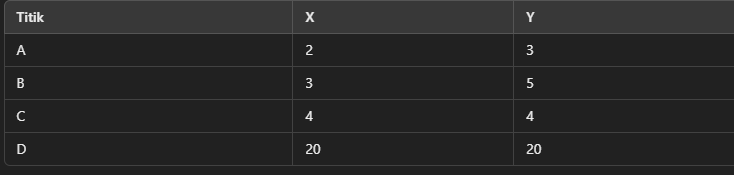

Kita akan menghitung LOF untuk titik D menggunakan k = 2 (2-nearest neighbors).

Rumus jarak Euclidean antara dua titik $\left(x_1, y_1\right)$ dan $\left(x_2, y_2\right)$ :
$$
d(A, B)=\sqrt{\left(x_2-x_1\right)^2+\left(y_2-y_1\right)^2}
$$

Mari kita hitung jarak D ke semua titik lain:
$$
\begin{aligned}
& d(D, A)=\sqrt{(20-2)^2+(20-3)^2}=\sqrt{324+289}=\sqrt{613} \approx 24.74 \\
& d(D, B)=\sqrt{(20-3)^2+(20-5)^2}=\sqrt{289+225}=\sqrt{514} \approx 22.71 \\
& d(D, C)=\sqrt{(20-4)^2+(20-4)^2}=\sqrt{256+256}=\sqrt{512} \approx 22.63
\end{aligned}
$$

Jadi, 2 tetangga terdekat titik D adalah C dan B.

Reachability Distance dihitung sebagai:
$$
\operatorname{reach}-\operatorname{dist}(D, C)=\max (\mathrm{k} \text {-distance }(C), d(D, C))
$$

Misalkan k-distance untuk C adalah jarak ke tetangga terdekatnya, yaitu:
$$
\mathrm{k} \text {-distance }(C)=d(C, B)=\sqrt{(4-3)^2+(4-5)^2}=\sqrt{1+1}=\sqrt{2} \approx 1.41
$$

Maka:
$$
\operatorname{reach}-\operatorname{dist}(D, C)=\max (1.41,22.63)=22.63
$$

Begitu juga:
$$
\operatorname{reach}-\operatorname{dist}(D, B)=\max (2.24,22.71)=22.71
$$

LRD dihitung dengan:
$$
\begin{aligned}
& \operatorname{LRD}(D)=\frac{k}{\sum_{i=1}^k \operatorname{reach-dist}(D, i) / k} \\
& \operatorname{LRD}(D)=\frac{2}{\left(\frac{22.63+22.11}{2}\right)} \\
&
\end{aligned}=\frac{2}{22.67} \approx 0.088 \quad 1 .
$$

LOF dihitung dengan:
$$
\operatorname{LOF}(D)=\frac{\sum_{i=1}^k \operatorname{LRD}(i) / k}{\operatorname{LRD}(D)}
$$

Misalkan LRD untuk titik C dan B adalah:
$$
\operatorname{LRD}(C)=0.50, \quad \operatorname{LRD}(B)=0.52
$$

Maka:
$$
\begin{aligned}
\operatorname{LOF}(D) & =\frac{(0.50+0.52) / 2}{0.088} \\
= & \frac{0.51}{0.088} \approx 5.8
\end{aligned}
$$

Jika LOF ≈ 1, berarti titik tersebut normal.
Jika LOF > 1, berarti titik tersebut outlier.
LOF(D) ≈ 5.8, artinya titik D adalah outlier!

# Implementasi menggunakan Sklearn

10 Data Sepal:
 id       class  sepal_length  sepal_width  outlier
  1 Iris-setosa           5.1          3.5    False
  2 Iris-setosa          40.9         30.0     True
  3 Iris-setosa           4.7          3.2    False
  4 Iris-setosa           4.6          3.1    False
  5 Iris-setosa           5.0          3.6    False
  6 Iris-setosa           5.4          3.9    False
  7 Iris-setosa           4.6          3.4    False
  8 Iris-setosa           5.0          3.4    False
  9 Iris-setosa           4.4          2.9    False
 10 Iris-setosa           4.9          3.1    False

10 Data Petal:
 id       class  petal_length  petal_width  outlier
  1 Iris-setosa           1.4          0.2    False
  2 Iris-setosa          14.0          2.0     True
  3 Iris-setosa           1.3          0.2    False
  4 Iris-setosa           1.5          0.2    False
  5 Iris-setosa           1.4          0.2    False
  6 Iris-setosa           1.7          0.4    False
  7 Iris-setosa           1.4    

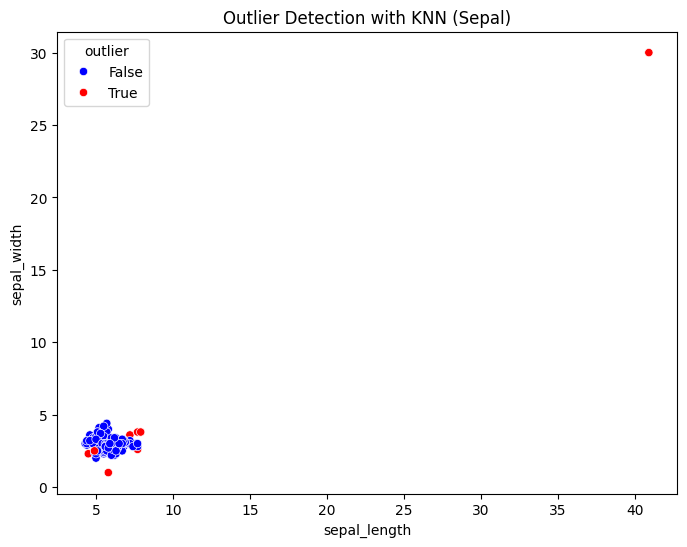

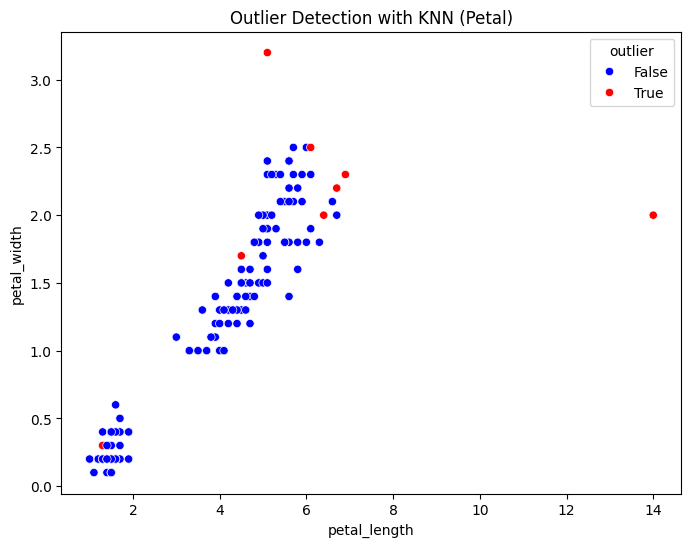

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Gunakan KNN untuk mendeteksi outlier
K = 5  # Jumlah tetangga terdekat
nbrs = NearestNeighbors(n_neighbors=K+1, metric='euclidean').fit(data_values)
distances, indices = nbrs.kneighbors(data_values)

# Ambil rata-rata jarak ke K tetangga terdekat (tidak termasuk jarak ke dirinya sendiri)
df_merged["knn_distance"] = np.mean(distances[:, 1:], axis=1)

# Tentukan threshold outlier berdasarkan persentil ke-95
threshold = np.percentile(df_merged["knn_distance"], 95)
df_merged["outlier"] = df_merged["knn_distance"] > threshold

# Cetak 10 data dari Sepal
print("10 Data Sepal:")
print(df_merged[["id", "class", "sepal_length", "sepal_width", "outlier"]].head(10).to_string(index=False))

# Cetak 10 data dari Petal
print("\n10 Data Petal:")
print(df_merged[["id", "class", "petal_length", "petal_width", "outlier"]].head(10).to_string(index=False))

# Visualisasi scatter plot Sepal
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection with KNN (Sepal)")
plt.show()

# Visualisasi scatter plot Petal
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection with KNN (Petal)")
plt.show()

# Deteksi Outlier Menggunakan Local Outlier Factor (LOF) di Sklearn

In [ ]:
from sklearn.neighbors import  LocalOutlierFactor
# Deteksi outlier dengan Local Outlier Factor (LOF)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(data_values)

# Tambahkan hasil prediksi ke DataFrame
df_merged["outlier_label"] = y_pred

# Filter data dengan outlier (-1) dan tampilkan kolom yang diminta
outlier_data = df_merged[df_merged["outlier_label"] == -1][["id", "petal_length", "petal_width", "sepal_length", "sepal_width"]]

# Cetak data outlier
print("Data Outlier (-1):")
print(outlier_data.to_string(index=False))

Data Outlier (-1):
 id  petal_length  petal_width  sepal_length  sepal_width
  2          14.0          2.0          40.9         30.0
 15           1.2          0.2           5.8          4.0
 16           1.5          0.4           5.7          4.4
 42           1.3          0.3           4.5          2.3
 58           3.3          1.0           4.9          2.4
 61           3.5          1.0           5.0          2.0
 94           3.3          1.0           5.0          2.3
 99           3.0          1.1           5.1          2.5
106           6.6          2.1           7.6          3.0
107           4.5          1.7           4.9          2.5
118           6.7          2.2           7.7          3.8
119           6.9          2.3           7.7          2.6
123           6.7          2.0           7.7          2.8
132           6.4          2.0           7.9          3.8
151           5.1          3.2           5.8          1.0
